# Ejercicio 3


Importamos las librerías necesarias:

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib notebook
from func import *
import numpy as np

Creamos el grafo y asignaciones que vamos a usar:

In [13]:
sa = nx.read_gml("TC01_data/as-22july06.gml")
N = sa.number_of_nodes()
listk = degrees2list(sa) # Lista con el grado de cada nodo, i.e len(listk)==N
kmax = max(listk)

Calculamos la distribución de grado, esto es $p_k = \frac{N_k}{N}$. Para eso, creamos un diccionario tal que las "keys" sean el grado y los "values" asociados sean la cantidad de nodos con ese grado. De allí sacamos la información necesaria para graficar la distribución de grado utilizando diferentes alternativas de visualización.

In [3]:
K = dict()

for i in set(listk):
    K[i] = 0

for k in listk:
    K[k] += 1

k = list(K.keys())  
pk = np.array(list(K.values()))/N

## Linear Binning

Empezamos graficando $p_k$ en función de $k$ con una escala lineal en ambos ejes. Se puede apreciar la presencia de una gran cantidad de nodos de bajo grado en comparación con nodos de alto grado. La escala lineal en el eje-$k$ no permite apreciar el comportamiento de nodos de orden bajo, simplemente se ve una acumulación de puntos en la zona cercana al cero. Además, se observan órdenes de magintud diferentes en el valor de $p_k$ para $k\sim1$ y $k>>1$, esto hace que al graficar $p_k$ en una escala lineal, no se puedan diferenciar los valores para los diferentes $k$ ya se que vuelven indistinguibles con $p_k=0$. De todas maneras, este primer gráfico nos anticipa la presencia de unos pocos nodos con grado muy alto en comparación con la mayoría de los nodos (hubs).

Para evitar estos inconvenientes de visualización, se realizó un segundo grafico usando escala logarítima base 10 en ambos ejes. Se puede ver cómo perdimos la acumulación de nodos con $k$ pequeño y podemos apreciar cómo varía el orden de magnitud de $p_k$ a medida que aumenta el grado. 

Decimos que el binneado es lineal porque todos los bins tienen el mismo tamaño, en nuestro caso $\Delta k=1$. En el gráfico log-log se reconoce fácilmente un plateau para $k$ grandes, es decir, un conjunto de puntos que forman una línea horizontal. Esto se debe a que típicamente tenemos una sola copia de cada nodo de alto grado, por lo que en la región de $k$ grandes tenemos o bien $N_k=1$ o $N_k=0$. De esta manera, el binneado lineal nos deja o bien $p_k=0$ (que no es visible en el gráfico log-log) o $p_k=\frac{1}{N}$ (hubs), generando un plateau en este útimo valor. Esta propiedad no es deseable si nuestra intención es estimar el exponente de grado $\gamma$ ajustando $\log k$ vs $\log p_k$ por una función lineal.


<IPython.core.display.Javascript object>


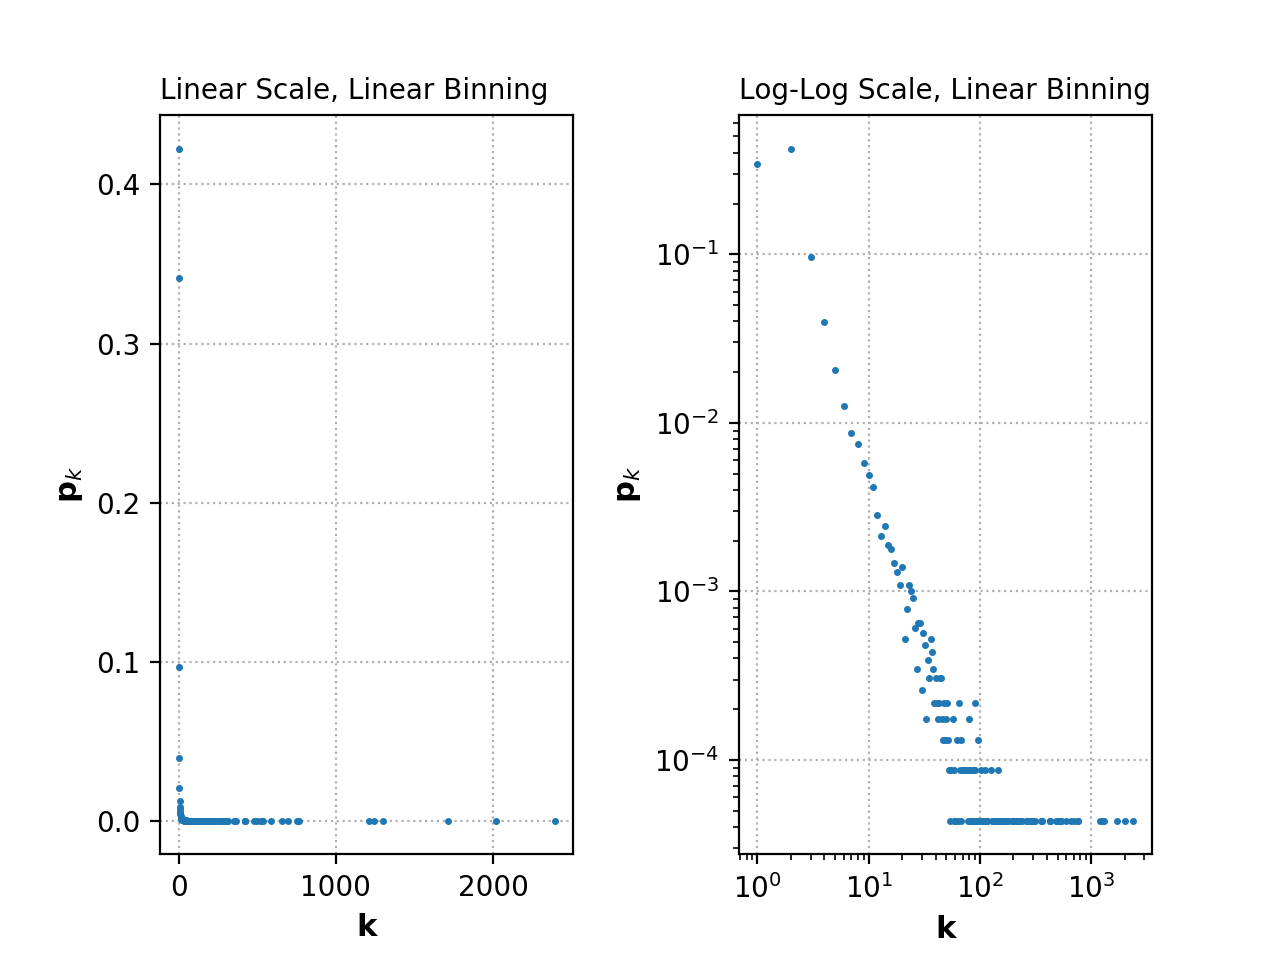

In [4]:
f, (ax1,ax2) = plt.subplots(1,2)

def applyPlotStyle():
    plt.xlabel('k',weight='bold',fontsize=11)
    plt.ylabel(r'p$_k$',weight='bold',fontsize=11)
    plt.grid(linestyle=':')

plt.sca(ax1)
plt.title('Linear Scale, Linear Binning',loc='left',fontsize=10)
plt.plot(k,pk,'.',markersize=3) 
applyPlotStyle()

plt.sca(ax2)
plt.title('Log-Log Scale, Linear Binning',loc='left',fontsize=10)
plt.loglog(k,pk,'.',markersize=3)
applyPlotStyle()

plt.subplots_adjust(wspace=0.4)

## Logarithmic Binning

El binneado logaritmico corrige el sampleo no uniforme del binneado lineal en el gráfico log-log. El tamaño del bin ahora va aumentando con $k$, de modo que el primer bin contiene los nodos con $k=1$ y es de tamaño $\Delta b_0=1$, el segundo contiene los nodos con $k=2,3,...,10$ y $\Delta b_1=10$, y siguiendo de esta manera, el enésimo tendrá un tamaño $\Delta b_n=10^n$ y contrendrá a los nodos con $k$ $\epsilon$ $(10^{n-1};10^n]$. La distribución de grado ahora estará dada por $p_{\langle k_i\rangle}=C \hspace{0.1cm}\frac{Ni}{\Delta b_i}$ donde $N_i$ es la cantidad de nodos que se encuentran en el bin $b_i$ de tamaño $\Delta b_i$, con $C$ es una constante de normalización y $\langle k_i\rangle$ es el grado promedio de los nodos en $b_i$.

Graficamos a continuación la función de distribución de grado con binneado logarítmico en escala lineal y logarítmica en ambos ejes. En gris se encuentra la distribución de grado con binneado lineal. Observamos que el plateau de los $k$ altos presente en el binneado lineal desaparece y nos permite extraer más información sobre el comportamiento estos pocos nodos de grado alto, los hubs.

In [7]:
n = 14
bins = np.logspace(0, np.log10(kmax+1), n)
h, bins = np.histogram(listk, bins)

centros = []
for i in range(len(bins)-1):
    c = (bins[i]+bins[i+1])/2
    centros.append(c)

A = []
for i in range(len(h)):
    A.append(h[i]/(bins[i+1]-bins[i]))
pk_log=A/sum(A)

<IPython.core.display.Javascript object>


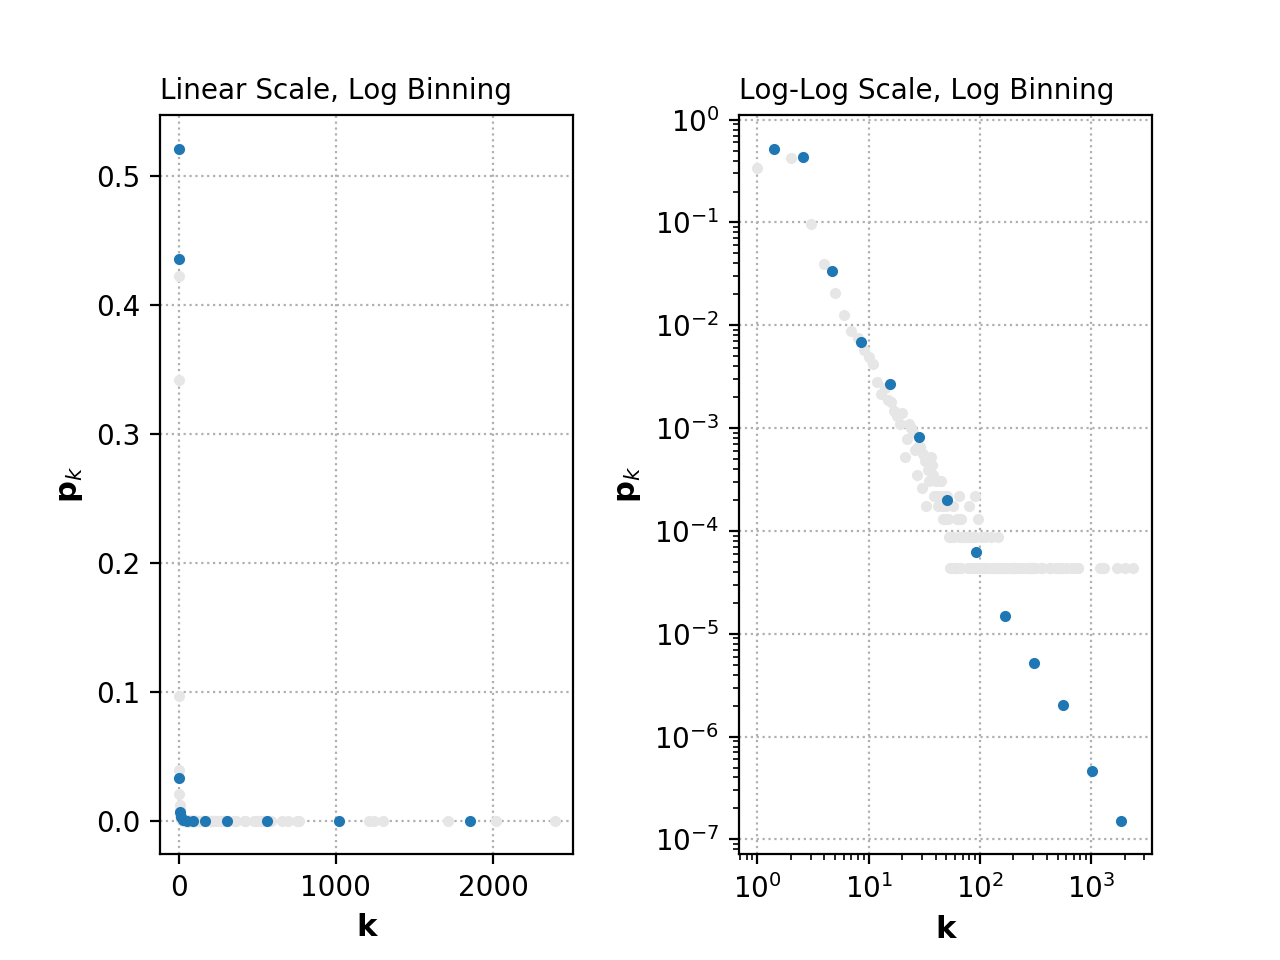

In [12]:
f, (ax1,ax2) = plt.subplots(1,2)

plt.sca(ax1)
plt.title('Linear Scale, Log Binning',loc='left',fontsize=10)
plt.plot(k,pk,'.',color='0.9')
plt.plot(centros,pk_log,'.')
applyPlotStyle()

plt.sca(ax2)
plt.title('Log-Log Scale, Log Binning',loc='left',fontsize=10)
plt.loglog(k,pk,'.',color='0.9')
plt.loglog(centros,pk_log,'.')
applyPlotStyle()

plt.subplots_adjust(wspace=0.4)

## Cumulative Distribution 

Otra forma de visualizar la ley de potencia sin necesidad de ir al binneado logaritmico es usando la función de distribución acumulada: $P_k=\sum_{q=k}^{k_{max}}p_q$, con $p_q$ la distribución de grado. La cumulative distribution $P_k$ nos indica probablidad de encontrar un nodo de grado $k$ o mayor.

Para calcularla, lo que hacemos es definir en ranking $r$ de un nodo como el número de nodos con grado mayor o igual que él. Luego, para cada nodo-$i$, tenemos que $P_{k_i}=\frac{r_{k_i}}{N}$ es la fracción de nodos con grado mayor o igual que el nodo rankeado $r_{k_i}$. Finalmente, se toma valor medio del $P_{k_i}$ de los nodos de igual grado $k$, siendo éste el valor de $P_k$ buscado.

A continuación mostramos el código donde se calculan los valores de la función de distribución acumulada usando este método y la graficamos. Allí podemos ver que el plateau elimina el plateau observado anteriormente. Los puntos grises representan $P_{k_i}$ y los celestes $P_k$.

In [16]:
# Ordenamos el grado de cada nodo de mayor a menor 
sortedk = sorted(listk,reverse=True)

# Asignamos un valor de ranking a cada uno
ranking = list(range(1,len(sortedk)+1))

# Fracción de nodos con grado mayor o igual que el rankeado i
frac = [ranking[i]/N for i in range(len(ranking))]

# Calculamos los valores de la función de distribución acumulada
d = dict(); Pk = []
for i in k:
    d[i] = []
for i in range(len(sortedk)):
    d[sortedk[i]].append(ranking[i])
for i in k:
    Pk.append(np.mean(d[i])/N)

<IPython.core.display.Javascript object>


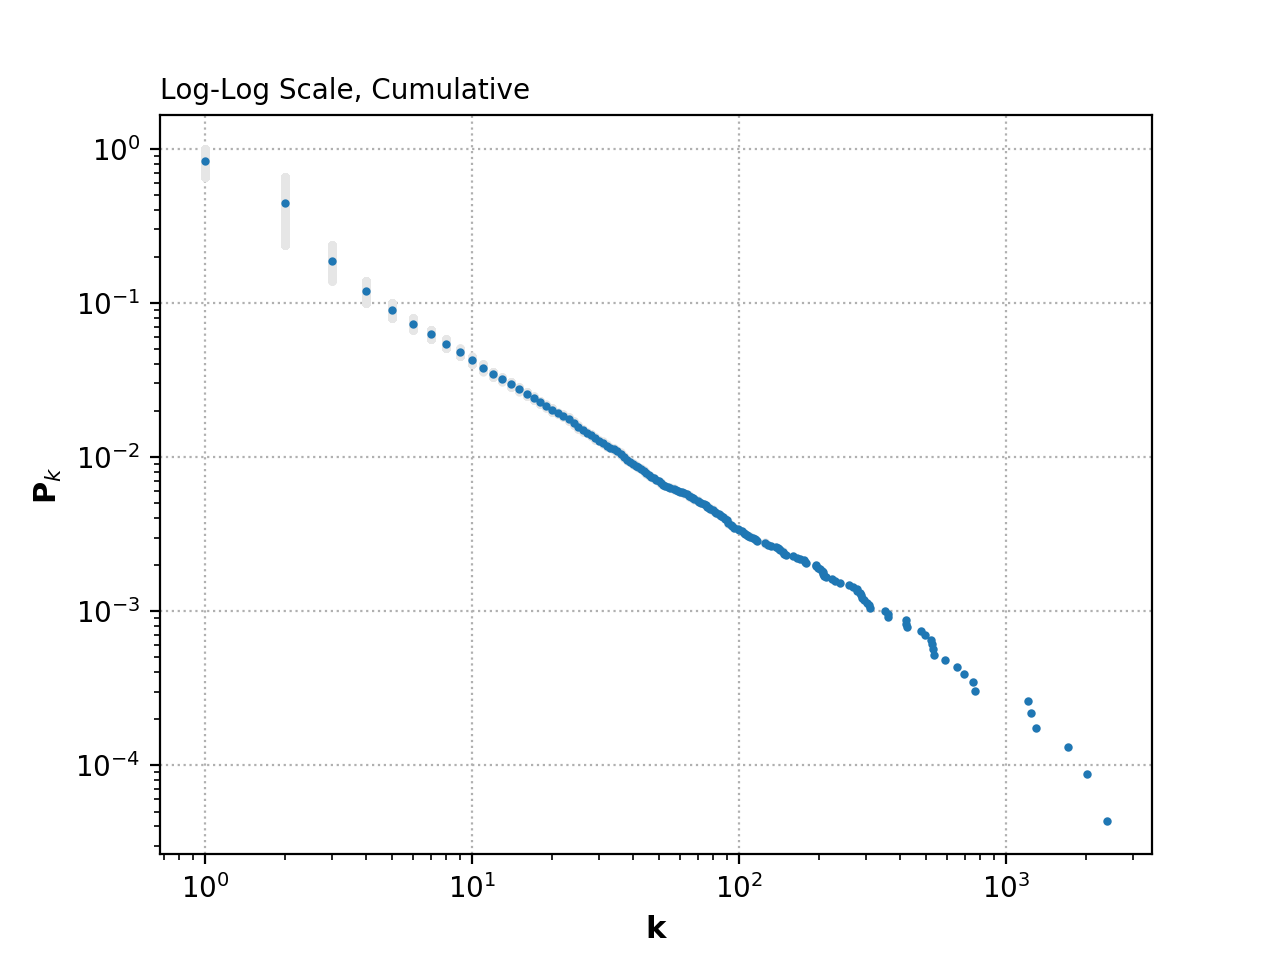

In [17]:
plt.title('Log-Log Scale, Cumulative',loc='left',fontsize=10)
plt.loglog(sortedk,frac,'.',color='0.9',markersize=4)
plt.loglog(k,Pk,'.',markersize=4)
applyPlotStyle()
plt.ylabel(r'P$_k$')
plt.show()

## Scale-Free Network and Power-law Distribution

Las redes libre de escala son aquellas cuya distribución de grado sigue una ley de potencias de manera que $p_k \propto k^{-\gamma}$, donde $\gamma$ es el exponente de grado. Tomando logaritmo de ambos lados, obtenemos 

$$\log p_k = -\gamma \log k + constante. \hspace{2cm} (i)$$ 

Además, se puede probar que valiendo esto, la función de distribución acumulada tiene una dependencia con $\gamma$ de la forma $P_k \propto k^{-(\gamma-1)}$, por lo que 

$$\log P_k = (-\gamma +1)\log k + constante'. \hspace{1cm} (ii)$$

Nuestra intención en esta útima parte es determinar el exponente de grado $\gamma$ suponiendo que la red con la que estamos trabajando se comporta como una Power-law. Ajustaremos por una función lineal según las Ecs. $(i)$ y $(ii)$. Es de nuestro conocimiento que hay un algoritmo específico (Maximum Likelihood Estimation) para estimar los parámetros del modelo. Intentamos ahondar en este procedimiento pero nos pareció que nos retrasaba en el trabajo y excedía lo que se esperaba de él. Es por esto, que a la hora de realizar el ajuste se tomó un $K_{min}$ arbitrario, pues nos pareció este un criterio más razonable que ajustar todos los puntos.

In [22]:
from scipy import optimize
    
# Función con la que queremos hacer el fit
fitfunc = lambda p,x: p[0]*x+p[1]

# Distancia a la función objetivo
errfunc = lambda p,x,y: fitfunc(p,x)-y 

powerlaw = lambda x, C, a: C*(x**a)

#### Ajuste a la distribución de grado

El valor $K_{min}$ a partir del cual se ajustaron los datos se encuentra resaltado en el gráfico. Los puntos grises representan la función de distribución con binneado lineal y los celestes con binneado logarítmico, datos en los que se realizó el ajuste. El exponente de grado resultó $\gamma=2.04 \pm 0.50$.

In [41]:
# Datos que se van a fittear
x = np.log10(np.array(centros[4:]))
y = np.log10(np.array(pk_log[4:]))
p0 = [-2,2] # Parametros iniciales para fitear

#Realizo el ajuste con scipy
out = optimize.leastsq(errfunc, p0, args=(x,y), full_output = 1)
p1 = out[0]; covar = out[1]

# Parámetros de la power-law
C = 10.0**p1[1]
a = p1[0]
a_err = np.sqrt(covar[0][0])

<IPython.core.display.Javascript object>


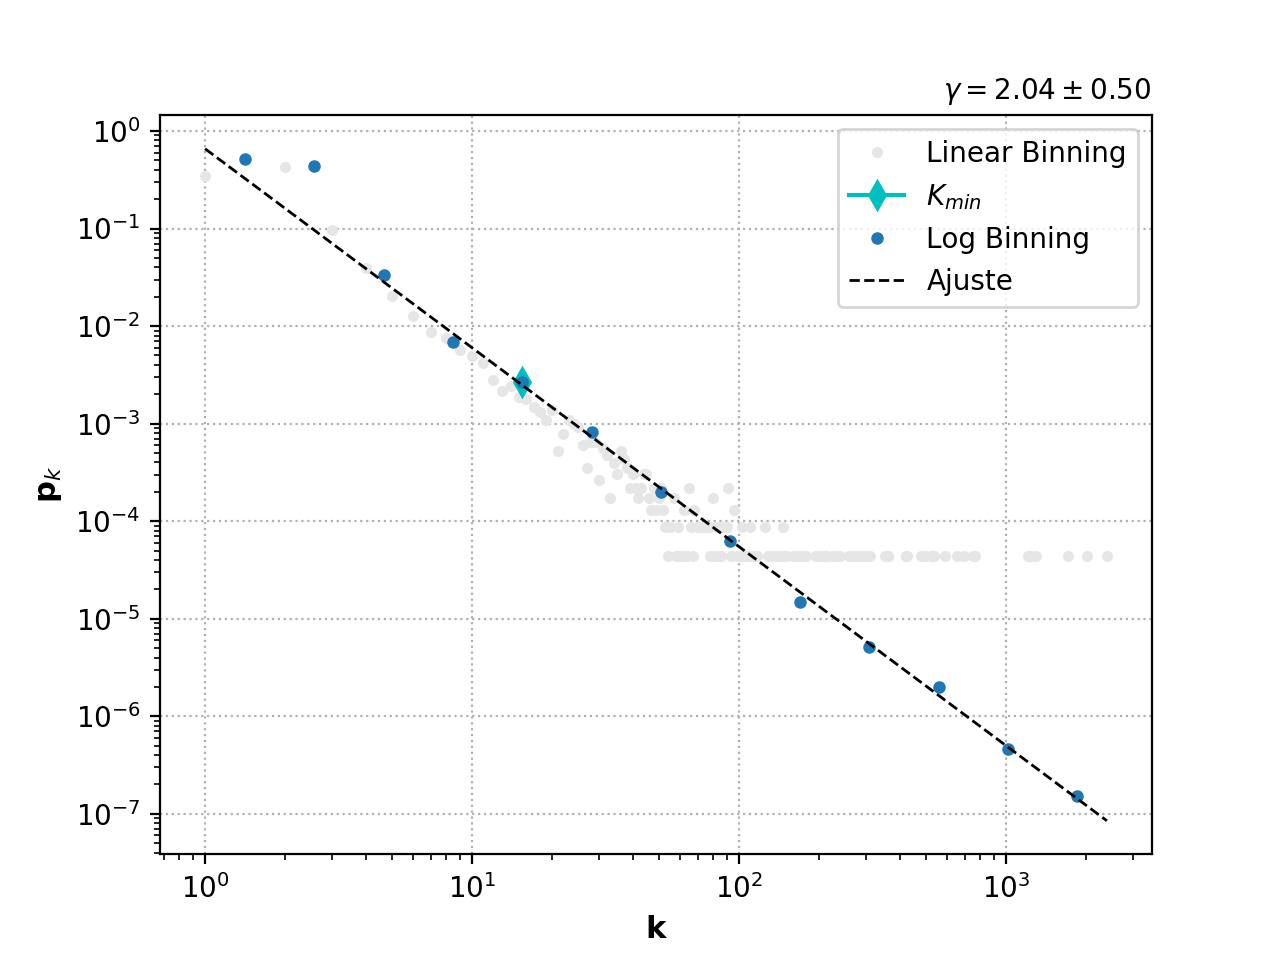

In [49]:
plt.title(r'$\gamma= %5.2f \pm %5.2f$' %(-a, a_err),loc='right',fontsize=10)
plt.loglog(k,pk,'.',color='0.9',label='Linear Binning')
plt.loglog(centros[4],pk_log[4],marker='d',color='c',markersize=7,label=r'$K_{min}$')
plt.loglog(centros,pk_log,'.',markersize=7,label='Log Binning')
plt.loglog(ejex,powerlaw(ejex,C,a),'k--',linewidth=1,label='Ajuste')
applyPlotStyle()
plt.legend()
plt.show()

#### Ajuste a la función de distribución acumulada

De nuevo el valor $K_{min}$ a partir del cual se ajustaron los datos se encuentra resaltado en el gráfico, siendo $K_{min}=15$. Los puntos celestes representan la función de distribución acumulada, donde se realizó el ajuste. El exponente de grado en este caso resultó $\gamma=2.09 \pm 0.17$.

In [43]:
# Datos que se van a fittear
x = np.log10(np.array(k[14:]))
y = np.log10(np.array(Pk[14:]))

# Ajuste con scipy
out2 = optimize.leastsq(errfunc, p0, args=(x,y), full_output = 1)
p2 = out2[0]; covar2 = out2[1]

# Parámetros de la power-law
C2 = 10.0**p2[1]
a2 = p2[0]
a_err2 = np.sqrt(covar2[0][0])

<IPython.core.display.Javascript object>


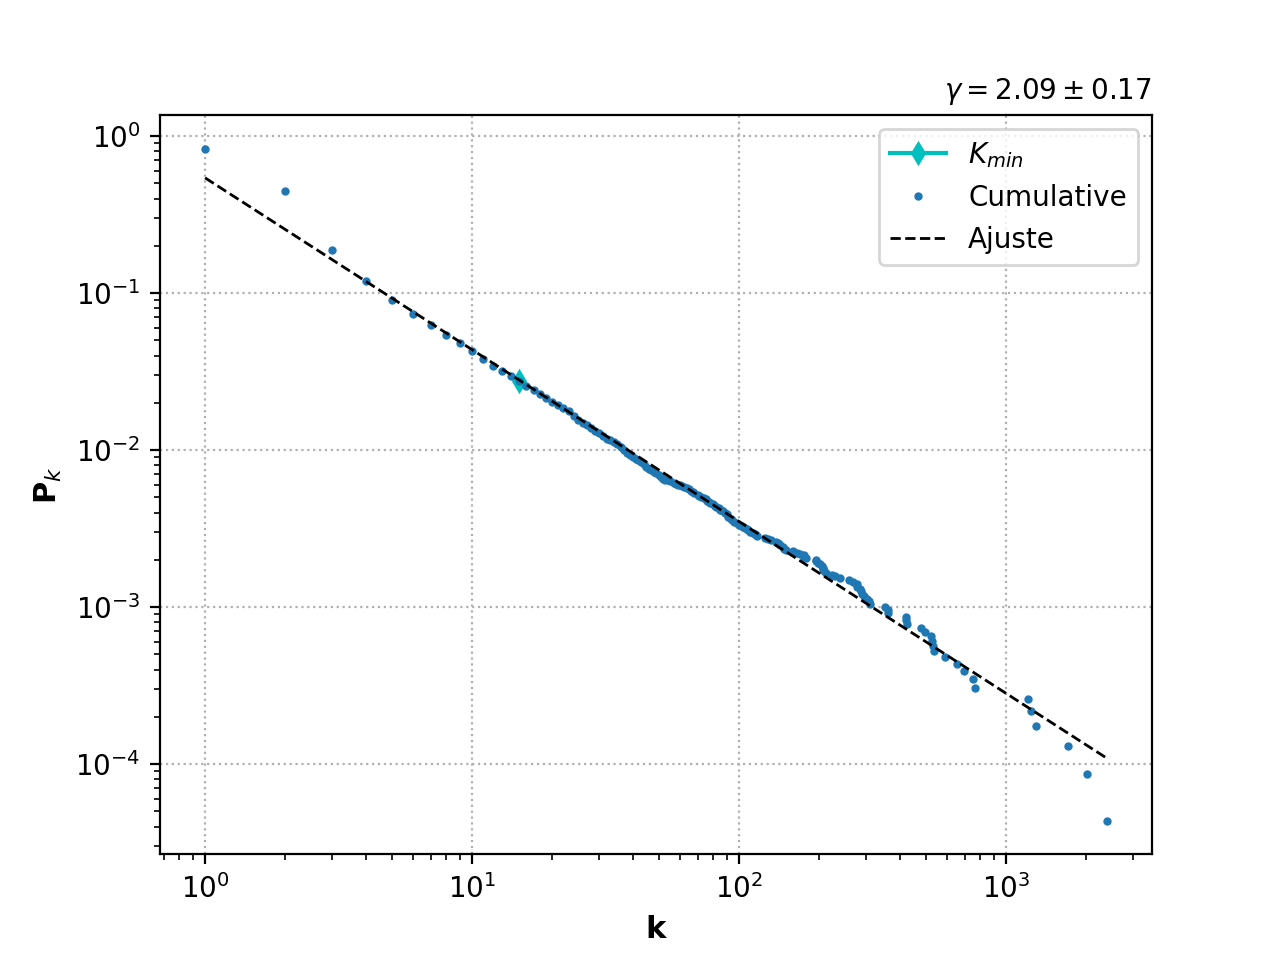

In [48]:
plt.title(r'$\gamma= %5.2f \pm %5.2f$' %(-a2+1, a_err2),loc='right',fontsize=10)
plt.loglog(k[14],Pk[14],marker='d',color='c',markersize=5,label=r'$K_{min}$')
plt.loglog(k,Pk,'.',markersize=4,label='Cumulative')
plt.loglog(ejex,powerlaw(ejex,C2,a2),'k--',linewidth=1,label='Ajuste')
applyPlotStyle()
plt.ylabel(r'P$_k$')
plt.legend()
plt.show()

El rango en el cual se estima el exponente de grado se solapa para ambos ajustes y se encuentra dentro de los valores esperados para una red libre de escala (2 < $\gamma$ < 3).